*Lilyan TOUSSAINT, Toulouse le 27/12/2021.*
# **Assimilation de donées Homework B**






## **"How will the bore propagate?"**



Dans le cadre du cours d'assimilation de données on nous a fournis le programme suivant:

sig= 1 sigr= 10
======= Experiment0 =======


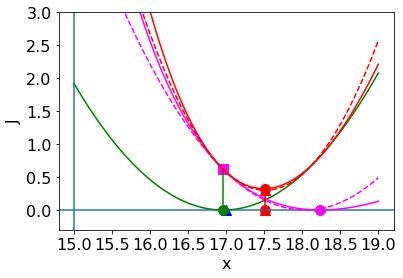

======= Experiment1 =======


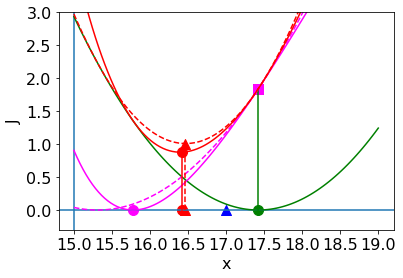

======= Experiment2 =======


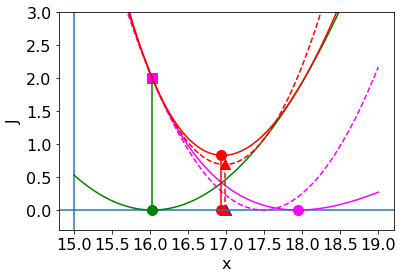

======= Experiment3 =======


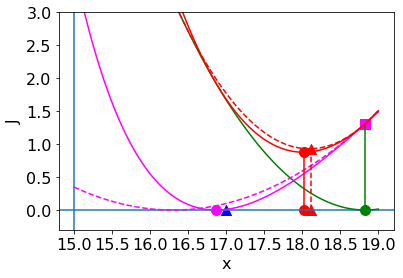

======= Experiment4 =======


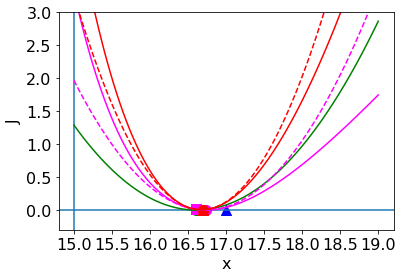

======= Experiment5 =======


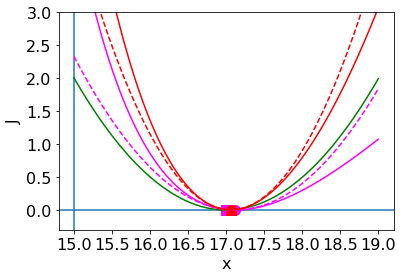

======= Experiment6 =======


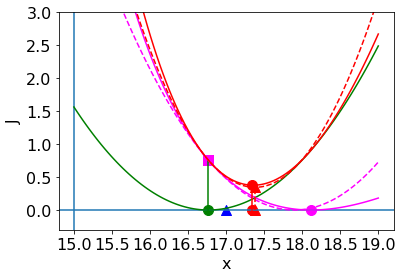

======= Experiment7 =======


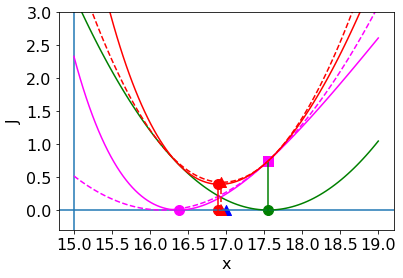

======= Experiment8 =======


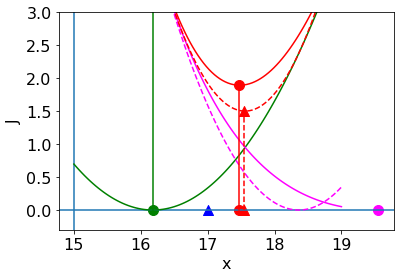

======= Experiment9 =======


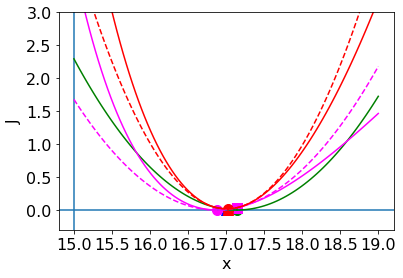

Close all figures to stop the program


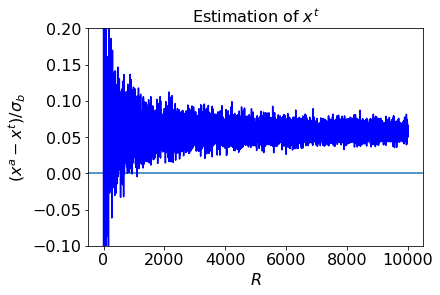

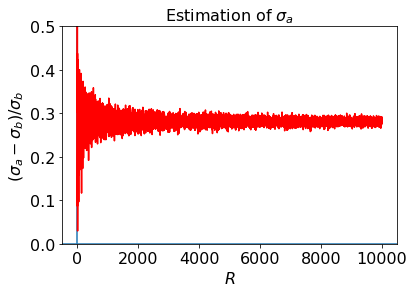

In [ ]:
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt
              

plt.close('all')

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)

    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=10; 
print('sig=',sigb,'sigr=',sigr)

# Plotting the cost functions
if True :
    R=10
    xmin=15; xmax=19; 
    x=np.linspace(xmin,xmax,100)
    for r in range(R):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig(xaxe=xmin,ylab='J')
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        ymin=-.3; ymax=3
        plt.ylim(ymin,ymax) 
        print('======= Experiment'+str(r)+' =======')
      
        plt.savefig('cost'+str(r)+'.pdf')
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    
    for R in np.arange(2,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/R
        V=np.sum((xa-xt)**2)/R
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb;
        scormea=np.append(scormea,smea)
        scorsig=np.append(scorsig,ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(scormea,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.ylim(-.1,.2)   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(scorsig,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.ylim(0,.5)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()
    

Il a pour but de :
- montrer et comparé les différents aspect de la fonction cout, $J_b$, $J_r$, $J$, $J_{incr}$, $J_{rincr}$
- mesurer l'efficacité du programme à améliorer l'analyse en fonction du nombre de réalisation

###  **"Plotting the cost functions"**
Cette partie du programme réalise R expériences avec un vecteur de control $x$ de taille 100, allant de xmin à xmax.
#### **1) Background and Measurement**
Permet de crée l'ébauche $x_b$ qui vaut la valeur réél $x_t$
plus l'erreur d'ébauche qui a une espérence nul et une variance de $σ_{b}$ et $y_o$ qui vaut la valeur réel observé $y_t$ plus l'erreur de mesure qui a elle aussi une espérence nul et une variance de $σ_{r}$.

#### **2) plotting Jb, Jr and J**

$J_b$ et $J_r$ sont des composantes de $J$ qui est la fonction coût à minimiser. 

On a :

$J(x)=J_b(x)+J_r(y)$ avec y=G(x)

soit:

$J(x)=J_b(x)+J_r(G(x))$ (ici G(x) est cG_nol(x) dans le programme)

avec

$J_b=\frac{(x-x_b)^2}{2σ_{b}^2}$ (la partie analyse) et
$J_r=\frac{(y_o-G(x))^2}{2σ_{r}^2}$ (la partie observation)

Ici les fonctions $J_b$, $J_r$ et $J$ vont être affiché.

#### **3) plotting Jinc, Jrinc**
$J_{rinc}$ et $J_{r}$ sont des composante de $J_{inc}$. Celui-ci est une version linéarisé de $J$, il est construit avec la linéarisation de la fonction G(x) (qui est non linéaire) et qui est utilisé pour construire $J_{rinc}$ et donc $J_{inc}$.

On a:

$J(x)=J_b(x)+J_{rinc}(x)$ 

avec $J_{rinc}(x)= \frac{(y_o-G(x_b)-G'(x_b)(x-x_b))^2}{2σ_{r}^2}$

Ici les fonctions $J_{rinc}$ er $J_{inc}$ vont être affiché.
De plus, il y a un calcul pour trouver et afficher, $x_a$ qui est le x qui minimise $J(x)$ et $x_{ainc}$ qui est le x minimise $J_{inc}$ .







###  "Scores for the estimation of sigma_a"
Dans cette partie on a poussé l'analyse plus loin pour trouver $x_a$. Une fois qu'on a $J_{inc}$
$J_{inc}(x_a)=\frac{(x_a-x_b)^2}{2σ_{b}^2}+\frac{(y_o-G(x_b)-G'(x_b)(x_a-x_b))^2}{2σ_{r}^2}$

on calcule ca dérivé: 

$J_{inc}'(x_a)=\frac{(x_a-x_b)}{σ_{b}^2}+G'(x_b)\frac{-y_o+G(x_b)+G'(x_b)(x_a-x_b)}{2σ_{r}}=0$

$x_a=x_b+\frac{G'(x_b)d}{σ_{b}^2}(σ_{b}^{-2}+G'(x_b)σ_{r}^{-2})$ avec $d=y_o+G(x_b)$

On peut mettre ca sous la forme:

$x_a=x_b + d K$ où K est le gain et d " l'innovation"

Ici on va faire 1000 expériences,chaqune d'elle fait R réalisations, allant de 2 à 1000. Cela permet de regarder l'influence du nombre de réalisation pris en compte l'approximation de la moyenne et de la variance de $x_a$ par rapport à celle de xt


Le score de moyenne est calculé avec l'espérence de $x_a$ et $x_t$ 

$ scormea = \frac{E(x_a)-x_t}{σ_{b}} $

Et le score de variance est calculé avec la variance de $x_a$ et de $x_b$

$ scores = \frac{σ_{b}- σ_{a}}{σ_{b}} $



## **Description des résultats**

### Influence de R sur les scores
Lorsque R augmente on a:

$E(x_a)-x_t$ converge vers une valeur qui n'est pas 0,  ceci est du à la partie innovation de $x_a$:

$scormea=\frac{E(x_a)-x_t}{σ_{b}} $

$= \frac{E(x_b+Kd)-x_t}{σ_{b}}$

$= \frac{E(x_b)+E(Kd)-x_t}{σ_{b}}$

Lorque R tend vers l'infini $E(x_b)$ tend vers $x_t$

donc scormea tend vers $\frac{E(Kd)}{σ_{b}}$ .

Et de meme pour scorsig la partie innovation va faire tendre celui-ci vers un valeur qui n'est pas 0.





### **L'effets de $\sigma_b$ et $\sigma_r$** 

Le programme ci dessous permet de voir l'effet de la variation de $\sigma_b$ et $\sigma_r$ sur les 2 scores. Le 1er programme a $\sigma_b$ fixé et $\sigma_r$ variable, le 2nd programme a $\sigma_r$ fixé et $\sigma_b$ variable  

Close all figures to stop the program


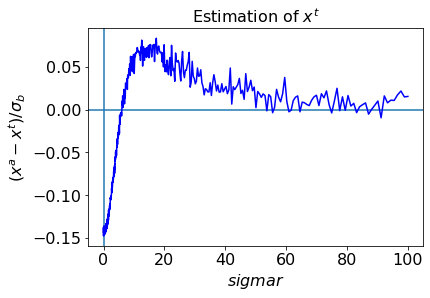

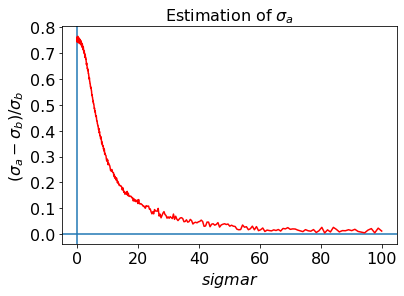

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=np.logspace(-3,2,1000); 

# Plotting the cost functions

# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    score1=[]
    score2=[]
    for i in range(len(sigr)):
        xb=xt+np.random.normal(0,sigb,Rmax)
        yo=yt+np.random.normal(0,sigr[i],Rmax)
        G=G_lin(xb)
        K=(G/sigr[i]**2)/(1/sigb**2+G**2/sigr[i]**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/Rmax
        V=np.sum((xa-xt)**2)/Rmax
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb
        score1.append(smea)
        score2.append(ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$sigmar$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(sigr,score1,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$sigmar$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(sigr,score2,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()

Close all figures to stop the program


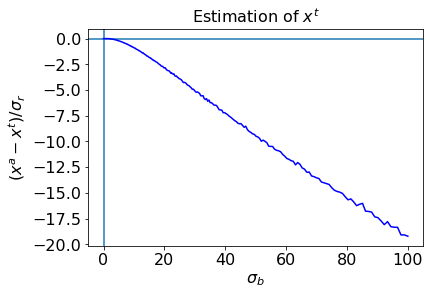

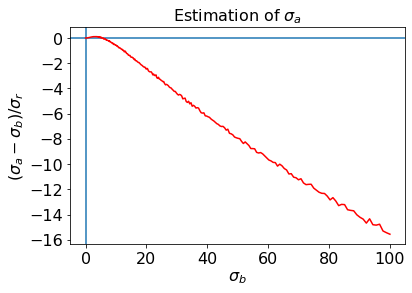

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=np.logspace(-3,2,1000);  sigr=10; 

# Plotting the cost functions

# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    score1=[]
    score2=[]
    for i in range(len(sigb)):
        xb=xt+np.random.normal(0,sigb[i] ,Rmax)
        yo=yt+np.random.normal(0,sigr,Rmax)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb[i]**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/Rmax
        V=np.sum((xa-xt)**2)/Rmax
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigr;
        ssig=(sigb[i]-sigaR)/sigr 
        score1.append(smea)
        score2.append(ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$\sigma_b$',ylab='$(x^a-x^t)/\sigma_r$')
    plt.plot(sigb,score1,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$\sigma_b$',ylab='($\sigma_a-\sigma_b)/\sigma_r$')
    plt.plot(sigb,score2,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()

Lorsque l'on fait varier les variance $\sigma_b$ et $\sigma_a$ en les augmentant, cela dégrade le score de variance, donc l'estimation de $\sigma_a$. Pour ce qui est du score de moyenne celui-ci s'améliore et tend vers 0 lorsque $\sigma_r$ augmente, donc $x_a$ tend vers $x_t$. De plus le score de moyenne se dégrade lorsque $\sigma_b$ augmente

##Changement de G et G'

Dans cette partie la fonction d'observation a été modifié.

sig= 1 sigr= 10
======= Experiment0 =======


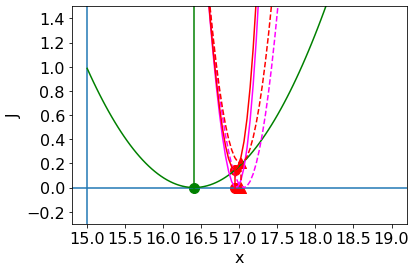

======= Experiment1 =======


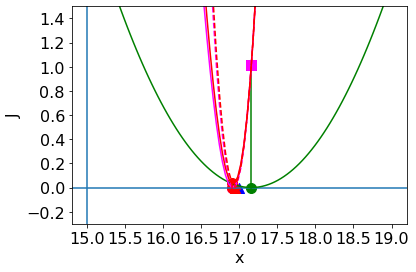

======= Experiment2 =======


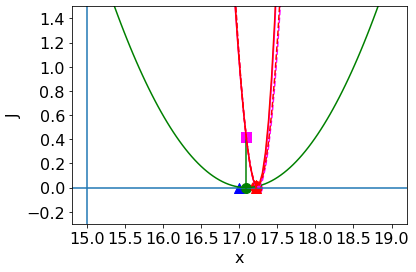

======= Experiment3 =======


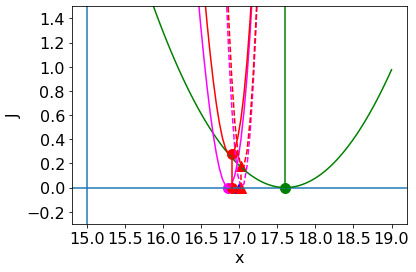

======= Experiment4 =======


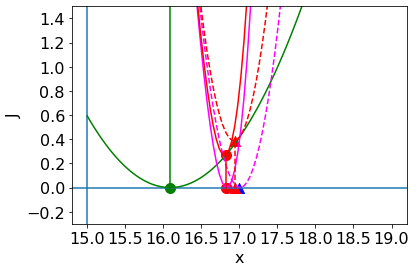

======= Experiment5 =======


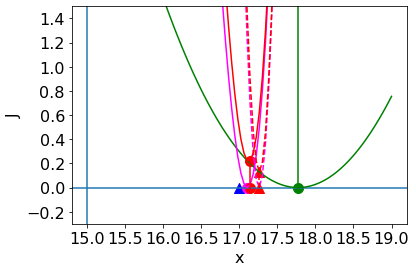

======= Experiment6 =======


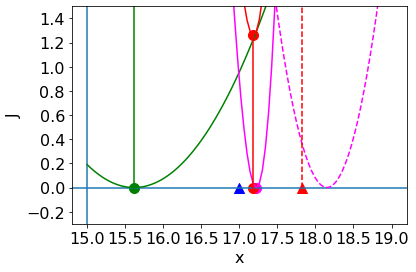

======= Experiment7 =======


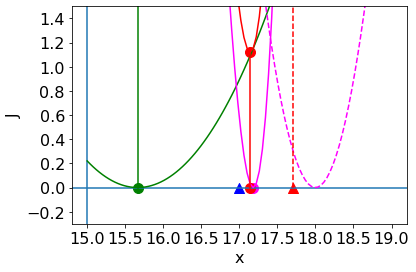

======= Experiment8 =======


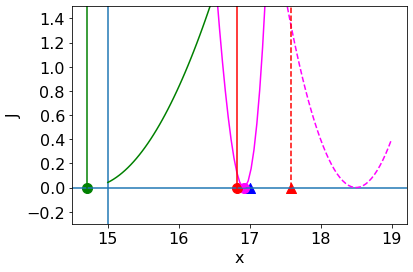

======= Experiment9 =======


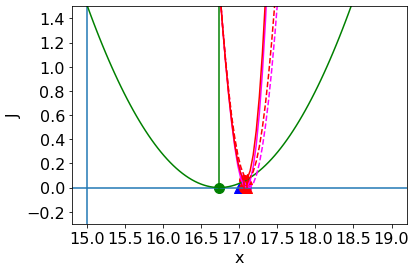

Close all figures to stop the program


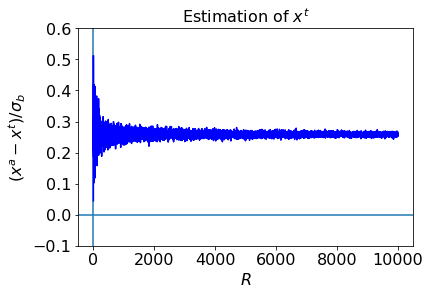

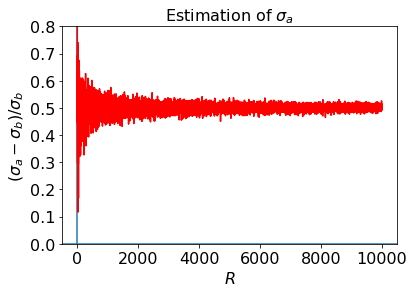

In [ ]:
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt
              

plt.close('all')

def cG_nol(x):
    # Observation operator
    y=-q/(x-2*hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-2*hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)

    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=10; 
print('sig=',sigb,'sigr=',sigr)

# Plotting the cost functions
if True :
    R=10
    xmin=15; xmax=19; 
    x=np.linspace(xmin,xmax,100)
    for r in range(R):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig(xaxe=xmin,ylab='J')
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=2*hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        ymin=-.3; ymax=1.5
        plt.ylim(ymin,ymax) 
        print('======= Experiment'+str(r)+' =======')
      
        plt.savefig('cost'+str(r)+'.pdf')
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if True :
    Rmax=10000; scormea=[]; scorsig=[] 
    
    for R in np.arange(2,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/R
        V=np.sum((xa-xt)**2)/R
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb;
        scormea=np.append(scormea,smea)
        scorsig=np.append(scorsig,ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(scormea,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.ylim(-.1,0.6)   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(scorsig,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.ylim(0,0.8)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()